# Introduction to PyCaret - An open source low-code ML library

## This notebook consists 2 parts
 - Classification part using Titanic DataSet
 - Regression part using House Price Regression DataSet

![](https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png)

You can reach pycaret website and documentation from https://pycaret.org

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code. 

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.


# let's install pycaret ! 

In [1]:
!pip install pycaret

     |████████████████████████████████| 188 kB 4.9 MB/s 
     |████████████████████████████████| 259 kB 58.1 MB/s 
     |████████████████████████████████| 60 kB 4.7 MB/s 
     |████████████████████████████████| 63.9 MB 50.2 MB/s 
     |████████████████████████████████| 92 kB 201 kB/s 
     |████████████████████████████████| 7.0 MB 14.7 MB/s 
     |████████████████████████████████| 378 kB 54.4 MB/s 
     |████████████████████████████████| 127 kB 61.0 MB/s 
     |████████████████████████████████| 3.0 MB 47.7 MB/s 
     |████████████████████████████████| 81 kB 6.9 MB/s 
     |████████████████████████████████| 7.3 MB 15.1 MB/s 
     |████████████████████████████████| 142.8 MB 37 kB/s 
     |████████████████████████████████| 234 kB 43.0 MB/s 
     |████████████████████████████████| 2.1 MB 26.9 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 6.1 MB 48.3 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for shap

# Part 1 Classification

![](https://www.sciencealert.com/images/articles/processed/titanic-1_1024.jpg)

# We start by loading the libraries

In [2]:
import numpy as np 
import pandas as pd 

# Read our files

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test  = pd.read_csv('../input/titanic/test.csv')
sub   = pd.read_csv('../input/titanic/gender_submission.csv')

# Import whole classification

In [4]:
from pycaret.classification import *

# let's see what we're dealing with

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Set up our dataset (preprocessing)

In [7]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

#quite intuitive isn't it ?

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1939
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Compare the models

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.8104,0.8396,0.7239,0.767,0.742,0.5932
1,Gradient Boosting Classifier,0.8055,0.8375,0.7109,0.7653,0.7348,0.5821
2,CatBoost Classifier,0.8023,0.8524,0.7109,0.762,0.7312,0.576
3,Extreme Gradient Boosting,0.7991,0.8344,0.7027,0.7601,0.728,0.5694
4,Logistic Regression,0.7879,0.8366,0.6942,0.7371,0.7092,0.544
5,Ridge Classifier,0.7861,0,0.6736,0.7409,0.7004,0.5366
6,Ada Boost Classifier,0.7799,0.8033,0.7277,0.7091,0.711,0.535
7,Linear Discriminant Analysis,0.7749,0.8301,0.6694,0.7218,0.6892,0.515
8,Random Forest Classifier,0.7735,0.821,0.6736,0.7221,0.6926,0.5147
9,Extra Trees Classifier,0.7655,0.8035,0.6942,0.6944,0.6918,0.5032


# let's create a Light GBM Model

In [9]:
lgbm  = create_model('lightgbm')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8718,0.8333,0.8000,0.8163,0.6995
1,0.8254,0.8686,0.7500,0.7826,0.7660,0.6268
2,0.8730,0.9156,0.8333,0.8333,0.8333,0.7308
3,0.7742,0.7163,0.7391,0.6800,0.7083,0.5246
4,0.7419,0.7769,0.6250,0.6818,0.6522,0.4477
5,0.9032,0.9254,0.8333,0.9091,0.8696,0.7929
6,0.8548,0.8635,0.8333,0.8000,0.8163,0.6964
7,0.8065,0.8893,0.6667,0.8000,0.7273,0.5792
8,0.7097,0.7533,0.4583,0.6875,0.5500,0.3481
9,0.7581,0.8158,0.6667,0.6957,0.6809,0.4862


# Let's tune it!

In [10]:
tuned_lightgbm = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.8761,0.7083,0.8500,0.7727,0.6523
1,0.8413,0.8878,0.7917,0.7917,0.7917,0.6635
2,0.9048,0.9338,0.7917,0.9500,0.8636,0.7914
3,0.7419,0.7308,0.6957,0.6400,0.6667,0.4567
4,0.7258,0.7516,0.5417,0.6842,0.6047,0.3991
5,0.8387,0.8887,0.7917,0.7917,0.7917,0.6601
6,0.8387,0.9008,0.8333,0.7692,0.8000,0.6652
7,0.7903,0.8975,0.6250,0.7895,0.6977,0.5405
8,0.7742,0.7851,0.5000,0.8571,0.6316,0.4846
9,0.7742,0.8114,0.6250,0.7500,0.6818,0.5090


# Learning Curve

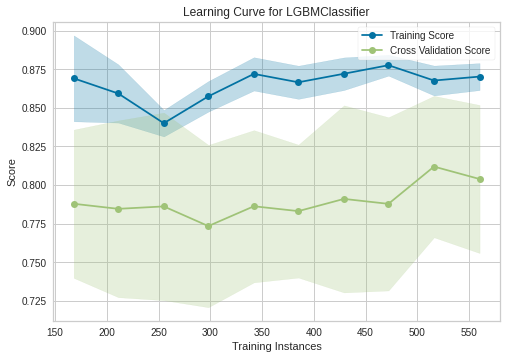

In [11]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

# AUC Curve

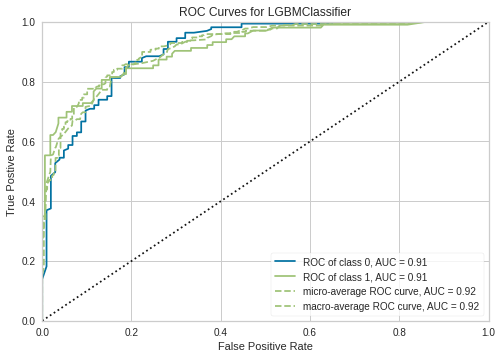

In [12]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

# Confusion Matrix

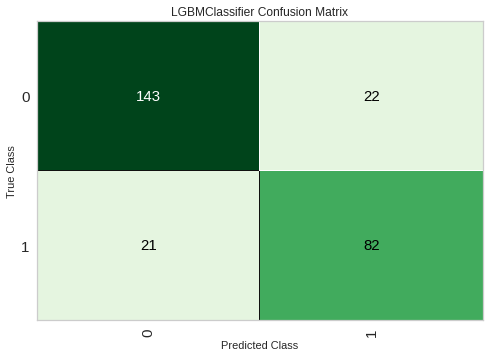

In [13]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

# Feature Importance

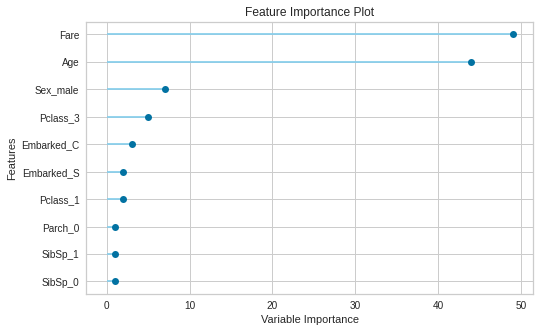

In [14]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

# whole thing!

In [15]:
evaluate_model(tuned_lightgbm)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.5
max_depth,80
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.3
n_estimators,150


# Interpretation

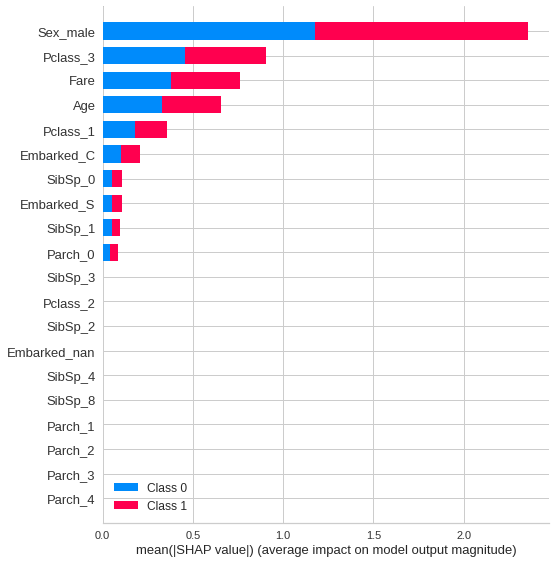

In [16]:
interpret_model(tuned_lightgbm)

# Predictions

In [17]:
predict_model(tuned_lightgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0999
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2964
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0476
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1574
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.6372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.1271
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9220
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.0429
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.1271


In [18]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0999
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.2964
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0476
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.1574
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0.6372


In [19]:
sub['Survived'] = round(predictions['Score']).astype(int)
sub.to_csv('submission.csv',index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Extra: Blending made easy!

In [20]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8413,0.0,0.7500,0.8182,0.7826,0.6580
1,0.8571,0.0,0.7917,0.8261,0.8085,0.6947
2,0.9206,0.0,0.8333,0.9524,0.8889,0.8276
3,0.7419,0.0,0.6957,0.6400,0.6667,0.4567
4,0.7258,0.0,0.5417,0.6842,0.6047,0.3991
5,0.8387,0.0,0.7917,0.7917,0.7917,0.6601
6,0.8387,0.0,0.8333,0.7692,0.8000,0.6652
7,0.7903,0.0,0.6667,0.7619,0.7111,0.5477
8,0.8065,0.0,0.5833,0.8750,0.7000,0.5654
9,0.7581,0.0,0.6250,0.7143,0.6667,0.4781


# Part2 - Regression

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYeyNpaoAW-3rFX9-ORmiJ-uLAAswYBRhszs2QzllV7MCfFPvk&usqp=CAU)

# Import Whole Regression

In [21]:
from pycaret.regression import *

# let's see the data

In [22]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sample= pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Set up our dataset (preprocessing)

In [25]:
reg = setup(data = train, 
             target = 'SalePrice',
             numeric_imputation = 'mean',
             categorical_features = ['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType',
                                     'Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',   
                                     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',    
                                     'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',   
                                     'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',   
                                     'Electrical','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                     'SaleCondition']  , 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             normalize = True,
             silent = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5356
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# let's compare different regression models!

In [26]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14999.4,6.61365e+08,24871.4,0.895,0.1205,0.0854
1,Gradient Boosting Regressor,16825.3,7.18922e+08,26385.7,0.8815,0.1336,0.0978
2,Random Forest,18079.9,8.26801e+08,28343.3,0.8678,0.1478,0.1068
3,Extreme Gradient Boosting,16907.2,8.35482e+08,27850.1,0.8625,0.1363,0.0986
4,Light Gradient Boosting Machine,17511.4,8.64567e+08,28876.8,0.8594,0.1396,0.0996
5,Passive Aggressive Regressor,16171.9,9.78856e+08,28932.9,0.8476,0.1293,0.0919
6,Huber Regressor,16190.5,9.99232e+08,28624.7,0.8418,0.1331,0.0931
7,Lasso Least Angle Regression,16223.8,9.83415e+08,28402.5,0.8406,0.1327,0.093
8,Orthogonal Matching Pursuit,17407.6,1.07036e+09,29549.7,0.8265,0.1414,0.1013
9,Bayesian Ridge,17848.7,1.19796e+09,31359.3,0.8064,0.1461,0.104


# let's do CatBoost

In [27]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12454.1901,3.461201e+08,18604.3021,0.9487,0.0799,0.0606
1,13825.3931,4.100465e+08,20249.6043,0.8651,0.1187,0.0902
2,16688.6522,9.356967e+08,30589.1593,0.8991,0.1126,0.0843
3,16154.3007,6.957343e+08,26376.7760,0.8631,0.1227,0.0877
4,13522.2073,4.141901e+08,20351.6620,0.9416,0.0839,0.0654
5,19853.5196,1.149684e+09,33906.9919,0.8767,0.1526,0.1113
6,16504.7276,6.919059e+08,26304.1051,0.8974,0.1601,0.1088
7,13861.8190,3.788086e+08,19463.0069,0.9364,0.1147,0.0826
8,14892.0145,1.316323e+09,36281.1683,0.7900,0.1486,0.0885
9,12237.6076,2.751382e+08,16587.2903,0.9323,0.1116,0.0752


# gotta tune it

In [28]:
tuned_cb = tune_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,11867.6755,3.695045e+08,19222.4992,0.9452,0.0834,0.0590
1,15700.8919,5.401165e+08,23240.4066,0.8223,0.1340,0.1036
2,16910.6329,8.884990e+08,29807.7003,0.9042,0.1176,0.0876
3,16232.6935,6.916108e+08,26298.4952,0.8639,0.1291,0.0916
4,14308.8429,4.547244e+08,21324.2684,0.9359,0.0966,0.0720
5,20743.8996,1.283251e+09,35822.4990,0.8624,0.1576,0.1163
6,16700.5534,7.020775e+08,26496.7455,0.8959,0.1606,0.1105
7,15086.1998,4.077447e+08,20192.6901,0.9315,0.1210,0.0896
8,17614.2677,1.647530e+09,40589.7831,0.7372,0.1582,0.1014
9,13742.7465,3.628052e+08,19047.4462,0.9107,0.1241,0.0840


# SHAP Values (impact on model output)

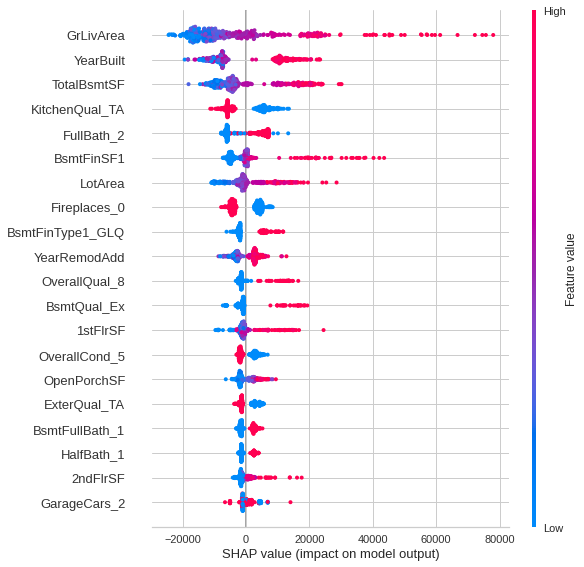

In [29]:
interpret_model(tuned_cb)

In [30]:
predictions = predict_model(tuned_cb, data = test)
sample['SalePrice'] = predictions['Label']
sample.to_csv('submission_house_price.csv',index=False)
sample.head()

,Id,SalePrice
0,1461,127765.7213
1,1462,174930.4944
2,1463,213284.5526
3,1464,225589.9453
4,1465,198384.9617


# thank you very much for checking my notebook!